# Wordle Analysis

## Part 1: Data Analysis

### Let's first analyze the dataset of 5 letter English words.
Taken from https://www-cs-faculty.stanford.edu/~knuth/sgb-words.txt

In [ ]:
# Fetch the dataset
import urllib.request

dataset = list()

with urllib.request.urlopen('https://www-cs-faculty.stanford.edu/~knuth/sgb-words.txt') as f:
    html = f.read().decode('utf-8')
    dataset = html.split('\n')
    
# Sort the list alphabetically
dataset = sorted(dataset)

# Remove the first entry from list which is ''
dataset.pop(0)

# Also store as a dictionary
dataset_dictionary = {x: 0 for x in dataset}

print("Number of words:", len(dataset))

Number of words: 5757


In [ ]:
# Let's see a sample of the dataset
print(dataset[:15])

['aargh', 'abaca', 'abaci', 'aback', 'abaft', 'abase', 'abash', 'abate', 'abbey', 'abbot', 'abeam', 'abend', 'abets', 'abhor', 'abide']


### Now for some interesting statistics

In [ ]:
# This portion analyzes alphabet frequency across words

from string import ascii_lowercase

list_of_letters = list()
list_of_letters[:0] = ascii_lowercase

letter_count = dict()
letter_count_with_duplicates = dict()

for letter in list_of_letters:
    letter_count[letter] = 0
    letter_count_with_duplicates[letter] = 0

for word in dataset:
    # We need to find the unique occurrence of the letter
    for letter in list_of_letters:
        if letter in word:
            letter_count[letter] += 1
        # This permits duplicates of same letter
        letter_count_with_duplicates[letter] += word.count(letter)


print("Unique occurrence of letter:")
print(letter_count)

print("\n\nAll occurrences of letter:")
print(letter_count_with_duplicates)

Unique occurrence of letter:
{'a': 2181, 'b': 669, 'c': 920, 'd': 1100, 'e': 2658, 'f': 502, 'g': 651, 'h': 791, 'i': 1539, 'j': 88, 'k': 574, 'l': 1434, 'm': 794, 'n': 1219, 'o': 1683, 'p': 895, 'q': 53, 'r': 1799, 's': 2674, 't': 1462, 'u': 1068, 'v': 309, 'w': 501, 'x': 138, 'y': 868, 'z': 121}


All occurrences of letter:
{'a': 2348, 'b': 715, 'c': 964, 'd': 1181, 'e': 3009, 'f': 561, 'g': 679, 'h': 814, 'i': 1592, 'j': 89, 'k': 596, 'l': 1586, 'm': 843, 'n': 1285, 'o': 1915, 'p': 955, 'q': 53, 'r': 1910, 's': 3033, 't': 1585, 'u': 1089, 'v': 318, 'w': 505, 'x': 139, 'y': 886, 'z': 135}


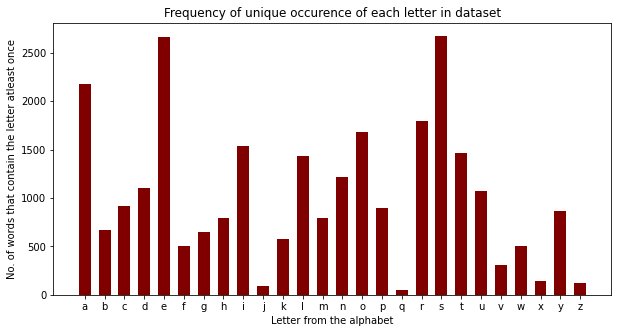

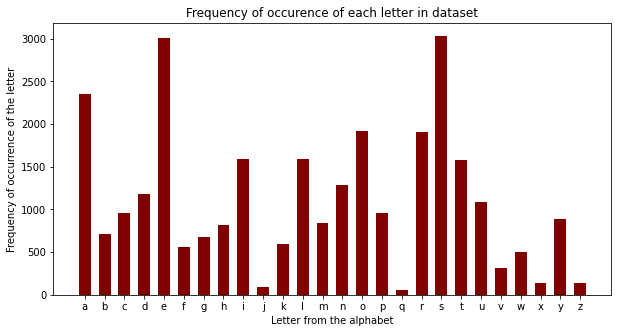

In [ ]:
# Visualizing the data

import numpy as np
import matplotlib.pyplot as plt
 
letters = list(letter_count.keys())
counts = list(letter_count.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(letters, counts, color ='maroon', width = 0.6)

plt.xlabel("Letter from the alphabet")
plt.ylabel("No. of words that contain the letter atleast once")
plt.title("Frequency of unique occurence of each letter in dataset")
plt.show()

print("\n\n\n")

letters_with_duplicates = list(letter_count_with_duplicates.keys())
counts_with_duplicates = list(letter_count_with_duplicates.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(letters_with_duplicates, counts_with_duplicates, color ='maroon', width = 0.6)

plt.xlabel("Letter from the alphabet")
plt.ylabel("Frequency of occurrence of the letter")
plt.title("Frequency of occurence of each letter in dataset")
plt.show()

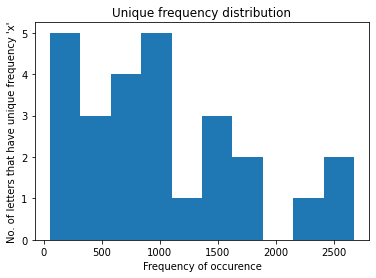

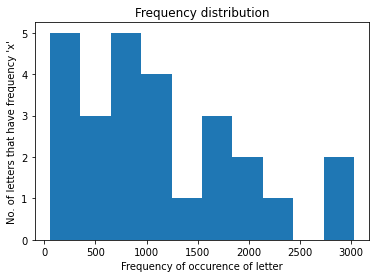

In [ ]:
plt.hist(counts)
plt.xlabel("Frequency of occurence")
plt.ylabel("No. of letters that have unique frequency 'x'")
plt.title("Unique frequency distribution")
plt.show()

print("\n\n\n")

plt.hist(counts_with_duplicates)
plt.xlabel("Frequency of occurence of letter")
plt.ylabel("No. of letters that have frequency 'x'")
plt.title("Frequency distribution")
plt.show()

In [ ]:
# Sorting the unique frequencies
sorted_freq = sorted(letter_count.items(), key = lambda x: x[1], reverse=True)
print("Sorted unique frequencies per letter:")
print(sorted_freq)

# Sorting the frequencies
sorted_freq_with_duplicates = sorted(letter_count_with_duplicates.items(), key = lambda x: x[1], reverse=True)
print("\n\nSorted total frequencies per letter:")
print(sorted_freq_with_duplicates)

Sorted unique frequencies per letter:
[('s', 2674), ('e', 2658), ('a', 2181), ('r', 1799), ('o', 1683), ('i', 1539), ('t', 1462), ('l', 1434), ('n', 1219), ('d', 1100), ('u', 1068), ('c', 920), ('p', 895), ('y', 868), ('m', 794), ('h', 791), ('b', 669), ('g', 651), ('k', 574), ('f', 502), ('w', 501), ('v', 309), ('x', 138), ('z', 121), ('j', 88), ('q', 53)]


Sorted total frequencies per letter:
[('s', 3033), ('e', 3009), ('a', 2348), ('o', 1915), ('r', 1910), ('i', 1592), ('l', 1586), ('t', 1585), ('n', 1285), ('d', 1181), ('u', 1089), ('c', 964), ('p', 955), ('y', 886), ('m', 843), ('h', 814), ('b', 715), ('g', 679), ('k', 596), ('f', 561), ('w', 505), ('v', 318), ('x', 139), ('z', 135), ('j', 89), ('q', 53)]


## Part 2: Forming a Hypothesis

#### Brainstorming
The first word you use with wordle is significant; landing on as many yellow or green boxes from the starting move is crucial and can minimize the number of moves.

Let's define an "ideal" starting word. This word `w` should be one that guarentees the user the highest probability of guessing the word-of-the-day within 6 moves.

`Objective: To find the "ideal" starting word.`

#### Hypothesis 1: The word whose anagram matches the most number of words is "ideal".

In [ ]:
# Generate all possible permutations of a given word
# Total number of possible permutations = 5! = 120

import itertools

dataset_permutation_matchscore = dict()

for word in dataset:
    word_permutations = [''.join(x) for x in list(itertools.permutations(word))]
    matchscore = 0
    
    for permutation in word_permutations:
        if permutation in dataset_dictionary and permutation != word: matchscore += 1

    dataset_permutation_matchscore[word] = matchscore
    

dataset_permutation_matchscore_sorted = sorted(dataset_permutation_matchscore.items(), key = lambda x: x[1], reverse=True)
print(dataset_permutation_matchscore_sorted)


[('ester', 8), ('least', 8), ('loops', 8), ('polos', 8), ('pools', 8), ('reset', 8), ('slate', 8), ('sloop', 8), ('spool', 8), ('stale', 8), ('steal', 8), ('steer', 8), ('stela', 8), ('taels', 8), ('tales', 8), ('teals', 8), ('terse', 8), ('tesla', 8), ('trees', 8), ('apers', 7), ('pares', 7), ('parse', 7), ('pears', 7), ('rapes', 7), ('reaps', 7), ('spare', 7), ('spear', 7), ('asset', 6), ('caret', 6), ('carte', 6), ('cater', 6), ('crate', 6), ('deist', 6), ('diest', 6), ('diets', 6), ('easts', 6), ('edits', 6), ('loess', 6), ('loses', 6), ('react', 6), ('recta', 6), ('ruses', 6), ('russe', 6), ('sates', 6), ('seats', 6), ('seeth', 6), ('serve', 6), ('sever', 6), ('sheet', 6), ('sited', 6), ('sloes', 6), ('soles', 6), ('stied', 6), ('suers', 6), ('thees', 6), ('these', 6), ('tides', 6), ('trace', 6), ('users', 6), ('veers', 6), ('verse', 6), ('abets', 5), ('bares', 5), ('baser', 5), ('baste', 5), ('bates', 5), ('bears', 5), ('beast', 5), ('beats', 5), ('betas', 5), ('braes', 5), ('est

In [ ]:
# How many words do not contain the top 5 frequent letters?

def count_of_words_without_single_match(input):
    count = 0
    for word in dataset:
        if input[0] not in word:
            if input[1] not in word:
                if input[2] not in word:
                    if input[3] not in word:
                        if input[4] not in word:
                            count += 1
    return count

In [ ]:
print("Number of words that do not contain any letters from 'ester':", count_of_words_without_single_match("ester"))
print("Probability of getting atleast one yellow or green tile:", ((5757-747)/5757)*100)

Number of words that do not contain any letters from 'ester': 747
Probability of getting atleast one yellow or green tile: 87.0244919228765


Surely we can improve on this..

#### Hypothesis 2: Any and all words formed using the top 5 occuring alphabets that also belong to the dataset are "ideal".

In [ ]:
# First goal is to find if there is a word that contains the letters 's', 'e', 'a', 'r', 'o' in any order
for word in dataset:
    if word.find('s') != -1 and word.find('e') != -1 and word.find('a') != -1 and word.find('r') != -1 and word.find('o') != -1:
        print(word)

arose


In [ ]:
print("Number of words that do not contain top 5 frequency letters:", count_of_words_without_single_match("arose"))
print("Probability of getting atleast one yellow or green tile:", ((5757-310)/5757)*100)

Number of words that do not contain top 5 frequency letters: 310
Probability of getting atleast one yellow or green tile: 94.61525099878408


A starting word where, admittedly, the odds of "accidentally" getting the correct answer on the first try is a shabby 1/5757 but, on the other hand, the probability of getting a yellow or green tile is 94.6%? Can we really do any better?

I had a sudden 💡 moment as I realized that I was approaching the problem statement all wrong. Unlike humans playing wordle, the machine benefits much much more from information about the position of the tiles.

For e.g. a human given the information from their first move that the letter 'g' is in the second position of the final word might not necessarily find this information to be vital, but an algorithm will be able to narrow down the potential word list from 5757 to just under 30 words.

So the take-away is: information fed to the algorithm on which letter is in which position helps narrow down the potential wordlist, hence optimizing the next move.

#### Hypothesis 3: The word which minimizes the probability of getting a grey tile is "ideal".

In other words, the ideal word has optimal 5 letters such that the number of words that do not contain any of the 5 letters is the lowest.

In [ ]:
min_count = 5757
min_count_word = ""
for word in dataset:
    count = count_of_words_without_single_match(word)
    if count < min_count:
        min_count = count
        min_count_word = word

print("Ideal word:", min_count_word)
print("Number of words that do not contain the ideal word letters:", min_count)
print("Probability of getting atleast one yellow or green tile:", ((5757-min_count)/5757)*100)

Ideal word: aloes
Number of words that do not contain the ideal word letters: 288
Probability of getting atleast one yellow or green tile: 94.99739447628973
